## Imports

In [1]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import pandas as pd

## Data Prep

In [4]:
df = pd.read_csv('albumin_cleaned_for_psm.csv')

In [5]:
df.shape

(21785, 14)

In [6]:
df.albumin_24hrs.value_counts()

0    20215
1     1570
Name: albumin_24hrs, dtype: int64

In [7]:
#df.drop(columns = ['bl_albumin_value', 'albumin_lab_baseline_severity'], inplace=True)

In [8]:
df.head()

personid                           encounterid  \
0  03d73314-b41d-445a-992a-cda0a9ea94e6  54a10c80-5f0e-48e0-b6e2-e89a78ebf1c2   
1  0bd4cf71-9232-4d6c-bb76-b580a813d0b8  1684f4f6-2f4a-4441-8af9-c4165f550d54   
2  18964eca-c75c-42c5-a393-a3d0bf88f3fe  8cefd6d1-8303-4201-a0bc-014fdf683574   
3  21b88c50-de34-435d-8c60-357d6d8ca892  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09   
4  2fa666f4-5520-4ce9-b0bf-9ef4982d1d09  2eacacdb-b236-4d9f-ac95-02ecd5397e6e   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    0   9.904630                 0                 1.0                  36   
1    0   0.743750                 0                 1.0                  36   
2    0  13.193449                 0                 1.0                   4   
3    0   6.963056                 0                 0.0                  83   
4    1  34.975000                 0                 1.0                  52   

   Cirrhosis  CCI  qSOFA  albumin_timing  SEWS  albumin  albumin_24hrs  
0          0    0      1             0.0     1        1              0  
1          0    0      1             1.0     2        1              1  
2          1    8      0             0.0     0        1              0  
3          0    1      0             2.0     0        1              1  
4          0    5      0             0.0     0        1              0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21785 entries, 0 to 21784
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   personid            21785 non-null  object 
 1   encounterid         21785 non-null  object 
 2   ICU                 21785 non-null  int64  
 3   LOS_days            21785 non-null  float64
 4   90_day_mortality    21785 non-null  int64  
 5   90_day_readmission  21785 non-null  float64
 6   hospital_free_days  21785 non-null  int64  
 7   Cirrhosis           21785 non-null  int64  
 8   CCI                 21785 non-null  int64  
 9   qSOFA               21785 non-null  int64  
 10  albumin_timing      21785 non-null  float64
 11  SEWS                21785 non-null  int64  
 12  albumin             21785 non-null  int64  
 13  albumin_24hrs       21785 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 2.3+ MB


## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [10]:
df[df['albumin_24hrs'] == 1].LOS_days.describe()

count    1570.000000
mean        8.061263
std        10.904704
min         0.099306
25%         2.650313
50%         4.814236
75%         9.147396
max       119.877778
Name: LOS_days, dtype: float64

In [11]:
df[df['albumin_24hrs'] == 0].LOS_days.describe()

count    20215.000000
mean         4.717197
std          8.354747
min          0.000000
25%          0.461209
50%          1.187500
75%          5.899306
max        122.435417
Name: LOS_days, dtype: float64

In [12]:
df[df['albumin_24hrs'] == 1]['90_day_mortality'].value_counts()

0    1454
1     116
Name: 90_day_mortality, dtype: int64

In [14]:
df[df['albumin_24hrs'] == 0]['90_day_mortality'].value_counts()

0    19590
1      625
Name: 90_day_mortality, dtype: int64

In [15]:
df[df['albumin_24hrs'] == 1]['90_day_readmission'].value_counts()

0.0    938
1.0    632
Name: 90_day_readmission, dtype: int64

In [17]:
df[df['albumin_24hrs'] == 0]['90_day_readmission'].value_counts()

0.0    13659
1.0     6556
Name: 90_day_readmission, dtype: int64

In [18]:
df.head()

personid                           encounterid  \
0  03d73314-b41d-445a-992a-cda0a9ea94e6  54a10c80-5f0e-48e0-b6e2-e89a78ebf1c2   
1  0bd4cf71-9232-4d6c-bb76-b580a813d0b8  1684f4f6-2f4a-4441-8af9-c4165f550d54   
2  18964eca-c75c-42c5-a393-a3d0bf88f3fe  8cefd6d1-8303-4201-a0bc-014fdf683574   
3  21b88c50-de34-435d-8c60-357d6d8ca892  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09   
4  2fa666f4-5520-4ce9-b0bf-9ef4982d1d09  2eacacdb-b236-4d9f-ac95-02ecd5397e6e   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    0   9.904630                 0                 1.0                  36   
1    0   0.743750                 0                 1.0                  36   
2    0  13.193449                 0                 1.0                   4   
3    0   6.963056                 0                 0.0                  83   
4    1  34.975000                 0                 1.0                  52   

   Cirrhosis  CCI  qSOFA  albumin_timing  SEWS  albumin  albumin_24hrs  
0          0    0      1             0.0     1        1              0  
1          0    0      1             1.0     2        1              1  
2          1    8      0             0.0     0        1              0  
3          0    1      0             2.0     0        1              1  
4          0    5      0             0.0     0        1              0

In [19]:
# df.drop(columns=['90_day_mortality'], inplace=True)

In [20]:
df.head()

personid                           encounterid  \
0  03d73314-b41d-445a-992a-cda0a9ea94e6  54a10c80-5f0e-48e0-b6e2-e89a78ebf1c2   
1  0bd4cf71-9232-4d6c-bb76-b580a813d0b8  1684f4f6-2f4a-4441-8af9-c4165f550d54   
2  18964eca-c75c-42c5-a393-a3d0bf88f3fe  8cefd6d1-8303-4201-a0bc-014fdf683574   
3  21b88c50-de34-435d-8c60-357d6d8ca892  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09   
4  2fa666f4-5520-4ce9-b0bf-9ef4982d1d09  2eacacdb-b236-4d9f-ac95-02ecd5397e6e   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    0   9.904630                 0                 1.0                  36   
1    0   0.743750                 0                 1.0                  36   
2    0  13.193449                 0                 1.0                   4   
3    0   6.963056                 0                 0.0                  83   
4    1  34.975000                 0                 1.0                  52   

   Cirrhosis  CCI  qSOFA  albumin_timing  SEWS  albumin  albumin_24hrs  
0          0    0      1             0.0     1        1              0  
1          0    0      1             1.0     2        1              1  
2          1    8      0             0.0     0        1              0  
3          0    1      0             2.0     0        1              1  
4          0    5      0             0.0     0        1              0

In [21]:
df_a24 = df[['personid', 'encounterid', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'albumin_timing', 'albumin']]

In [22]:
df_a24.head()

personid                           encounterid  \
0  03d73314-b41d-445a-992a-cda0a9ea94e6  54a10c80-5f0e-48e0-b6e2-e89a78ebf1c2   
1  0bd4cf71-9232-4d6c-bb76-b580a813d0b8  1684f4f6-2f4a-4441-8af9-c4165f550d54   
2  18964eca-c75c-42c5-a393-a3d0bf88f3fe  8cefd6d1-8303-4201-a0bc-014fdf683574   
3  21b88c50-de34-435d-8c60-357d6d8ca892  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09   
4  2fa666f4-5520-4ce9-b0bf-9ef4982d1d09  2eacacdb-b236-4d9f-ac95-02ecd5397e6e   

    LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0   9.904630                 0                 1.0                  36   
1   0.743750                 0                 1.0                  36   
2  13.193449                 0                 1.0                   4   
3   6.963056                 0                 0.0                  83   
4  34.975000                 0                 1.0                  52   

   albumin_timing  albumin  
0             0.0        1  
1             1.0        1  
2             0.0        1  
3             2.0        1  
4             0.0        1

In [23]:
#df.drop(columns=['personid', 'encounterid', 'albumin_24'], inplace=True)

In [24]:
df.shape

(21785, 14)

In [25]:
df.head()

personid                           encounterid  \
0  03d73314-b41d-445a-992a-cda0a9ea94e6  54a10c80-5f0e-48e0-b6e2-e89a78ebf1c2   
1  0bd4cf71-9232-4d6c-bb76-b580a813d0b8  1684f4f6-2f4a-4441-8af9-c4165f550d54   
2  18964eca-c75c-42c5-a393-a3d0bf88f3fe  8cefd6d1-8303-4201-a0bc-014fdf683574   
3  21b88c50-de34-435d-8c60-357d6d8ca892  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09   
4  2fa666f4-5520-4ce9-b0bf-9ef4982d1d09  2eacacdb-b236-4d9f-ac95-02ecd5397e6e   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    0   9.904630                 0                 1.0                  36   
1    0   0.743750                 0                 1.0                  36   
2    0  13.193449                 0                 1.0                   4   
3    0   6.963056                 0                 0.0                  83   
4    1  34.975000                 0                 1.0                  52   

   Cirrhosis  CCI  qSOFA  albumin_timing  SEWS  albumin  albumin_24hrs  
0          0    0      1             0.0     1        1              0  
1          0    0      1             1.0     2        1              1  
2          1    8      0             0.0     0        1              0  
3          0    1      0             2.0     0        1              1  
4          0    5      0             0.0     0        1              0

## Initialize PsmPy Class

In [26]:
psm = PsmPy(df, treatment= 'albumin_24hrs', indx='encounterid', exclude = ['personid', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'albumin_timing', 'albumin'])

In [27]:
%%time
psm.logistic_ps(balance = True)

Wall time: 7.84 s


In [28]:
df_psm = psm.predicted_data

In [29]:
df_psm.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA  SEWS  \
0  1684f4f6-2f4a-4441-8af9-c4165f550d54    0          0    0      1     2   
1  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09    0          0    1      0     0   
2  6a0962cf-b9f7-4c4f-ba75-fc5207722a36    0          1    0      1     2   
3  3639f1d7-780b-4766-b9e5-b70db8f617b5    0          0    0      1     3   
4  59c8a1ba-0aa9-4a0e-9764-d96eb5a2df03    0          0    4      1     3   

   propensity_score  propensity_logit  albumin_24hrs  
0          0.635797          0.557167              1  
1          0.370413         -0.530446              1  
2          0.855310          1.776873              1  
3          0.671801          0.716343              1  
4          0.676695          0.738624              1

## Plot the propensity score / propensity logits

In [30]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 6min 39s


C:\ProgramData\Anaconda3\lib\site-packages\psmpy\psmpy.py:347: UserWarning: Some values do not have a match
  warnings.warn('Some values do not have a match')


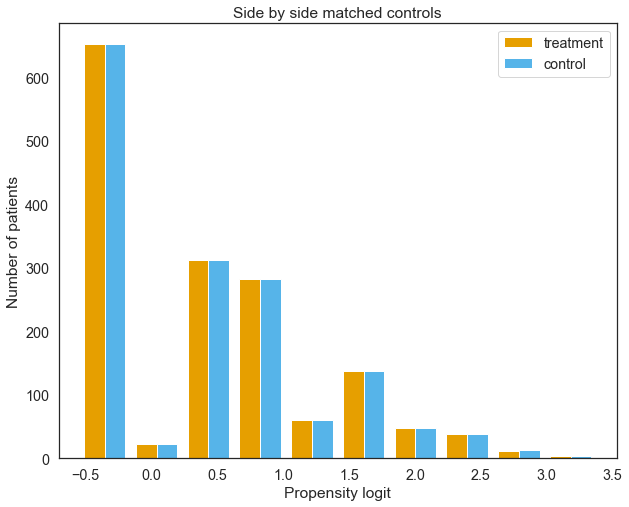

In [31]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

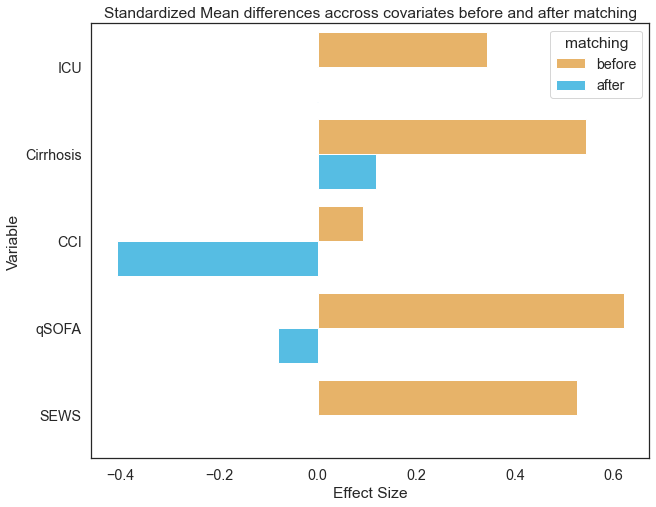

In [32]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [33]:
matched_df = psm.df_matched

In [34]:
matched_df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA  SEWS  \
0  1684f4f6-2f4a-4441-8af9-c4165f550d54    0          0    0      1     2   
1  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09    0          0    1      0     0   
2  6a0962cf-b9f7-4c4f-ba75-fc5207722a36    0          1    0      1     2   
3  3639f1d7-780b-4766-b9e5-b70db8f617b5    0          0    0      1     3   
4  59c8a1ba-0aa9-4a0e-9764-d96eb5a2df03    0          0    4      1     3   

   propensity_score  propensity_logit  albumin_24hrs  
0          0.635797          0.557167              1  
1          0.370413         -0.530446              1  
2          0.855310          1.776873              1  
3          0.671801          0.716343              1  
4          0.676695          0.738624              1

In [35]:
matched_df.shape

(3139, 9)

## Matched Ids

In [36]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  1684f4f6-2f4a-4441-8af9-c4165f550d54  1e2afb1e-9c73-4e51-9806-6be644db637a
1  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09  53f8408b-ae88-4d6d-84f4-e418d58d3545
2  6a0962cf-b9f7-4c4f-ba75-fc5207722a36  c7a7351b-69e1-4bc8-87aa-740d6b8bb0ac
3  3639f1d7-780b-4766-b9e5-b70db8f617b5  069d598c-85d6-4905-baf2-dcc0df2ccf58
4  59c8a1ba-0aa9-4a0e-9764-d96eb5a2df03  08764236-6f3a-41de-97a9-fbf224b22065

## Effect sizes per variables

In [37]:
psm.effect_size

Variable matching  Effect Size
0        ICU   before     0.343539
1        ICU    after    -0.002260
2  Cirrhosis   before     0.544007
3  Cirrhosis    after     0.118387
4        CCI   before     0.091109
5        CCI    after    -0.407284
6      qSOFA   before     0.620750
7      qSOFA    after    -0.080671
8       SEWS   before     0.524603
9       SEWS    after     0.002144

## Explore Matched df

In [38]:
matched_df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA  SEWS  \
0  1684f4f6-2f4a-4441-8af9-c4165f550d54    0          0    0      1     2   
1  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09    0          0    1      0     0   
2  6a0962cf-b9f7-4c4f-ba75-fc5207722a36    0          1    0      1     2   
3  3639f1d7-780b-4766-b9e5-b70db8f617b5    0          0    0      1     3   
4  59c8a1ba-0aa9-4a0e-9764-d96eb5a2df03    0          0    4      1     3   

   propensity_score  propensity_logit  albumin_24hrs  
0          0.635797          0.557167              1  
1          0.370413         -0.530446              1  
2          0.855310          1.776873              1  
3          0.671801          0.716343              1  
4          0.676695          0.738624              1

In [39]:
matched_df.albumin_24hrs.value_counts()

1    1570
0    1569
Name: albumin_24hrs, dtype: int64

In [40]:
matched_df.shape

(3139, 9)

## Join Matched df with earlier df on encounterid to add outcome variables

In [41]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [42]:
f_df.shape

(3139, 16)

In [43]:
f_df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA  SEWS  \
0  1684f4f6-2f4a-4441-8af9-c4165f550d54    0          0    0      1     2   
1  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09    0          0    1      0     0   
2  6a0962cf-b9f7-4c4f-ba75-fc5207722a36    0          1    0      1     2   
3  3639f1d7-780b-4766-b9e5-b70db8f617b5    0          0    0      1     3   
4  59c8a1ba-0aa9-4a0e-9764-d96eb5a2df03    0          0    4      1     3   

   propensity_score  propensity_logit  albumin_24hrs  \
0          0.635797          0.557167              1   
1          0.370413         -0.530446              1   
2          0.855310          1.776873              1   
3          0.671801          0.716343              1   
4          0.676695          0.738624              1   

                               personid  LOS_days  90_day_mortality  \
0  0bd4cf71-9232-4d6c-bb76-b580a813d0b8  0.743750                 0   
1  21b88c50-de34-435d-8c60-357d6d8ca892  6.963056                 0   
2  40cd7ee5-00d8-45af-8781-7ea6e956d8e9  4.140972                 0   
3  48531d48-8a10-46f1-b80d-252e08c651cd  1.348611                 0   
4  6ee7780f-14d7-4733-a47f-0b6c97e32870  9.985417                 0   

   90_day_readmission  hospital_free_days  albumin_timing  albumin  
0                 1.0                  36             1.0        1  
1                 0.0                  83             2.0        1  
2                 0.0                  14             2.0        1  
3                 0.0                   4             1.0        1  
4                 1.0                   9             2.0        1

In [44]:
f_df.to_csv('N04_matched.csv', index=False)